<a href="https://colab.research.google.com/github/groda/big_data/blob/master/GutenbergBooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/groda/big_data"><div><img src="https://github.com/groda/big_data/blob/master/logo_bdb.png?raw=true" align=right width="90" alt="Logo Big Data for Beginners"></div></a>
# Explore and download books from the Gutenberg Books collection

This Jupyter Notebook provides an interactive exploration and downloading interface for the Gutenberg Books Collection.

Explore the vast collection of books, analyze metadata, and download selected texts based on various criteria. Dive into literary exploration and access timeless classics with ease

**Note:** you can execute the whole "Preliminaries" section while it is collapsed by clicking on the "run" icon. Once all the cells in the "Preliminaries" section have been executed, all other cells can be executed independently of one another.


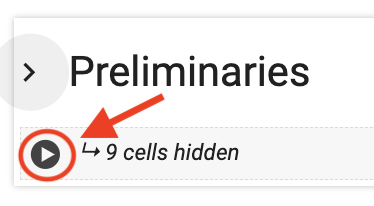

# Preliminaries

## Main class `GutenbergBooks`

In [1]:
import gzip
import urllib.request
import requests
import os
import io
import pandas as pd

GUTENBERG_URL = "https://www.gutenberg.org/cache/epub/feeds/pg_catalog.csv.gz"
GUTENBERG_CACHEDIR = "GutenbergBooks"

pd.options.mode.copy_on_write = True

class GutenbergBooks:
    def __init__(self):
        self.catalog_url = GUTENBERG_URL
        self.catalog_file = self.catalog_url.rsplit('/', 1)[-1][:-3]
        self.is_cached = os.path.isfile(self.catalog_file)
        self.catalog = self.fetch_catalog()
        self.all_subjects = self.get_subjects()
        self.cachedir = GUTENBERG_CACHEDIR

        if not os.path.exists(self.cachedir):
            os.makedirs(self.cachedir)

    def is_cached(self):
        if os.path.isfile(self.catalog_file):
            return True
        return False

    def cache_catalog(self):
        self.catalog = self.fetch_catalog(use_cache=False)
        self.catalog.to_csv(self.catalog_file)
        self.is_cached = True

    def is_book_downloaded(self, bookID):
        book_file = f"pg{bookID}.txt"
        if os.path.isfile(os.path.join(GUTENBERG_CACHEDIR, book_file)):
          return True
        return False

    def fetch_catalog(self, use_cache=True):
        url = self.catalog_url
        filename = self.catalog_file
        if self.is_cached and use_cache:
            print(f"Retrieving {filename} from cache. To refresh cache use cache_catalog()")
            dataframe = pd.read_csv(filename, quotechar = '"')
            return dataframe
        try:
            # Retrieve the compressed file from the URL
            print(f"Retrieving {filename} from {url}.")
            response = urllib.request.urlopen(url)
            compressed_data = response.read()
            # Decompress the data
            decompressed_data = gzip.decompress(compressed_data)
            # Load decompressed data into pandas DataFrame
            dataframe = pd.read_csv(io.StringIO(decompressed_data.decode('utf-8')), quotechar = '"')
            dataframe.to_csv(self.catalog_file)
            self.is_cached = True
            return dataframe
        except Exception as e:
            print("An error occurred:", e)
            return None

    def get_subjects(self):
        return self.catalog['Subjects'].str.split('; ').explode().unique().tolist()

    def random_subjects(self, n, seed):
        """
        This method returns n random subjects.
        Parameters:
        - n (int): number of subjects.
        - seed (int): random seed for reproducibility.
        Returns:
        - list: Random sample of subjects from the Gutenberg Books catalog
                following the subjects distribution.
        """
        df = self.catalog['Subjects']
        subject_counts = df.str.split('; ').explode() \
                           .groupby(df.str.split('; ').explode()).count() \
                           .reset_index(name='Count').sort_values(by='Count', ascending=False) \
                           .rename(columns={"Subjects": "Subject"}) \
                           .reset_index(drop=True)
        return subject_counts.sample(n=n, replace=False, random_state=seed, weights=subject_counts['Count'])

    def topn_subjects(self, n):
        df = self.catalog['Subjects']
        subject_counts = df.str.split('; ').explode() \
                           .groupby(df.str.split('; ').explode()).count() \
                           .reset_index(name='Count').sort_values(by='Count', ascending=False) \
                           .rename(columns={"Subjects": "Subject"})
        return subject_counts.reset_index(drop=True).head(n)

    def get_authors(self):
        return self.catalog['Authors'].str.split('; ').explode().unique().tolist()

    def random_authors(self, n, seed):
        df = self.catalog['Authors']
        author_counts = df.str.split('; ').explode() \
                           .groupby(df.str.split('; ').explode()).count() \
                           .reset_index(name='Count').sort_values(by='Count', ascending=False) \
                           .rename(columns={"Authors": "Author"}) \
                           .reset_index(drop=True)
        return author_counts.sample(n=n, replace=False, random_state=seed, weights=author_counts['Count'])

    def topn_authors(self, n):
        df = self.catalog['Authors']
        author_counts = df.str.split('; ').explode() \
                           .groupby(df.str.split('; ').explode()).count() \
                           .reset_index(name='Count').sort_values(by='Count', ascending=False) \
                           .rename(columns={"Authors": "Author"})
        return author_counts.reset_index(drop=True).head(n)

    def get_languages(self):
        return self.catalog['Language'].str.split('; ').explode().unique().tolist()

    def topn_languages(self, n):
        df = self.catalog['Language']
        language_counts = df.str.split('; ').explode() \
                            .groupby(df.str.split('; ').explode()).count() \
                            .reset_index(name='Count').sort_values(by='Count', ascending=False)
        return language_counts.reset_index(drop=True).head(n)

    def get_bookshelves(self):
        return self.catalog['Bookshelves'].str.split('; ').explode().unique().tolist()

    def topn_bookshelves(self, n):
        df = self.catalog['Bookshelves']
        bookshelf_counts = df.str.split('; ').explode() \
                             .groupby(df.str.split('; ').explode()).count() \
                             .reset_index(name='Count').sort_values(by='Count', ascending=False) \
                             .rename(columns={"Bookshelves": "Bookshelf"})
        return bookshelf_counts.reset_index(drop=True).head(n)

    def get_types(self):
        return self.catalog['Type'].unique().tolist()

    def get_books(self, lang, subject, title):
        return self.catalog.sample(n=n, replace=False, random_state=seed)

    def random_books(self, n, seed):
        return self.catalog.sample(n=n, replace=False, random_state=seed)

    def books_matching_subject(self, substr):
        return self.catalog.query(f'Subjects.str.lower().str.contains("{substr.lower()}", na=False)')

    def books_matching_author(self, substr):
        return self.catalog.query(f'Author.str.lower().str.contains("{substr.lower()}", na=False)')

    def books_matching_year(self, given_year):
        """
        Find books from the catalog that match a given year within the birth-death intervals of authors.

        Parameters:
        - given_year (int): The year to match within the birth-death intervals of authors.

        Returns:
        - DataFrame: A DataFrame containing books from the catalog where the given year falls within
                     the birth-death intervals of authors.

        This method extracts birth and death years from the 'Authors' column of the catalog and filters
        rows where the given year is within any birth-death interval. It returns a DataFrame of matching books.
        """
        catalog_copy = self.catalog.copy()
        # Create a temporary DataFrame to hold split author-interval pairs
        temp_df = catalog_copy['Authors'].str.extractall(r'((?:\w+\s+)?(?:\d{4})\s*-\s*(?:\d{4}))')
        temp_df.reset_index(inplace=True)
        temp_df.rename(columns={0: 'Author_Interval'}, inplace=True)
        # Merge the original catalog with the temporary DataFrame
        merged_df = pd.merge(catalog_copy, temp_df, left_index=True, right_on='level_0')
        # Extract birth and death years from the author-interval pairs
        merged_df['Birth_Year'] = merged_df['Author_Interval'].str.extract(r'(\d{4})')
        merged_df['Death_Year'] = merged_df['Author_Interval'].str.extract(r'\d{4}\s*-\s*(\d{4})')
        # Convert birth and death years to numeric
        merged_df['Birth_Year'] = pd.to_numeric(merged_df['Birth_Year'], errors='coerce')
        merged_df['Death_Year'] = pd.to_numeric(merged_df['Death_Year'], errors='coerce')
        # Filter rows where the given year is within any birth-death interval
        matching_books = merged_df[(merged_df['Birth_Year'] <= given_year) &
                               (merged_df['Death_Year'] >= given_year)]
        # Drop unnecessary columns
        matching_books.drop(columns=['Author_Interval', 'level_0'], inplace=True)
        # Return matching books
        return matching_books

    def download_book(self, nr):
        """
        Download one book from the Gutenberg collection identified by its id.
        If the book already exists in the cache folder, it is not downloaded again.
        Parameters:
        - nr (int): id of the book in the Gutenberg books collection.
        Returns:
        - str: the path where the book was downloaded.
        """
        b = str(nr)
        book = f"pg{b}.txt"
        url = f"https://www.gutenberg.org/cache/epub/{b}/{book}"
        book_path = os.path.join(GUTENBERG_CACHEDIR, book)
        if self.is_book_downloaded(b):
            print(f"Book {nr} already exists in cache. Not downloading.")
        else:
            try:
            # Retrieve the book from the URL
                print(f"Retrieving {book} from {url}.")
                with open(book_path, "w") as f:
                    f.write(requests.get(url).text)
            except Exception as e:
                print("An error occurred:", e)
                return None
        return book_path

    def download_books(self, books):
        """
        Download a list of books from the Gutenberg collection.
        If a book already exists in the cache folder, it is not downloaded again.
        Parameters:
        - books (list): list of ids of books in the Gutenberg books collection.
        Returns:
        - str: the path where the book was downloaded.
        """
        book_paths = []
        for b in books:
          path =self.download_book(b)
          book_paths += [path]
        return book_paths

    def download_n_books(self, n, subject):
        """
        Download a certain number of books from the Gutenberg collection based on the desired size and subject.
        If a book already exists in the cache folder, it is not downloaded again.

        Parameters:
        - n (int): The number of books to download.
        - subject (str): The subject to match when selecting books.

        Returns:
        - list: A list of paths where the downloaded books are saved.
        """
        # Get books matching the subject
        matching_books = self.books_matching_subject(subject)
        # Limit the number of books to download
        books_to_download = matching_books[:n]['Text#']
        # Download books
        book_paths = [self.download_book(b) for b in books_to_download]
        return book_paths

    def download_size_books(self, size_mb=128, subject=None):
        """
        Download books from the Gutenberg collection based on the desired total size and subject.
        If a book already exists in the cache folder, it is not downloaded again.

        Parameters:
        - size_mb (int): The desired total size of downloaded books in MB. Default is 128MB.
        - subject (str, optional): The subject to match when selecting books. Default is None.

        Returns:
        - list: A list of paths where the downloaded books are saved.
        """
        # Get books matching the subject if provided
        if subject:
            matching_books = self.books_matching_subject(subject)['Text#']
        else:
            matching_books = self.catalog['Text#']
        # Initialize variables
        total_size = 0
        books_to_download = []
        # Iterate through matching books until total size threshold is met
        for b in matching_books:
            if total_size >= size_mb * 1024 * 1024:  # Convert MB to bytes
                break
            book_path = self.download_book(b)
            file_size = os.path.getsize(book_path)
            # Add file size to total size
            total_size += file_size
            # Add book to download list
            books_to_download.append(b)
        # Download books
        book_paths = [self.download_book(b) for b in books_to_download]
        print(f"Total size: {int(total_size/1024/1024)}MB")
        if total_size <= size_mb * 1024 * 1024:
          print(f"Download more books to get {size_mb}MB")
        return book_paths

gb = GutenbergBooks()

Retrieving pg_catalog.csv from https://www.gutenberg.org/cache/epub/feeds/pg_catalog.csv.gz.


/tmp/ipykernel_3865/3652374547.py:56: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv(io.StringIO(decompressed_data.decode('utf-8')), quotechar = '"')


## Use `cache_catalog()` to create a cached copy of the catalog

In [2]:
# gb.cache_catalog()

## Interactive tables

Library `data_table` from Google Colab adds interactivity to Pandas tables.

https://colab.research.google.com/notebooks/data_table.ipynb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.7/221.7 kB 11.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip



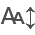

In [3]:
# true if running on Google Colab
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  from google.colab import data_table
  from vega_datasets import data
  data_table.enable_dataframe_formatter()
else:
  !pip install itables
  from itables import init_notebook_mode
  init_notebook_mode(all_interactive=True)

## Code for visualizations

This is needed for plotting.

In [4]:
import matplotlib
colors = matplotlib.cm.tab20(range(20))

# source: https://matplotlib.org/stable/gallery/misc/packed_bubbles.html
import matplotlib.pyplot as plt
import numpy as np

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 100
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

# Attempt to set the font family
desired_font_family = 'DejaVu Serif'
try:
    plt.rcParams['font.family'] = desired_font_family
    print(f"Using '{desired_font_family}' font family.")
except:
    print(f"Warning: Font family '{desired_font_family}' not found. Using fallback font.")
    plt.rcParams['font.family'] = 'serif'  # Fallback to a generic serif font


Using 'DejaVu Serif' font family.


# Explore

## Books

### All books

The whole Gutenberg collection catalog is saved in the `catalog` of the `GutenbergBooks` object `gb`.

In [5]:
gb.catalog

Text#  Type      Issued  \
0          1  Text  1971-12-01   
1          2  Text  1972-12-01   
2          3  Text  1973-11-01   
3          4  Text  1973-11-01   
4          5  Text  1975-12-01   
...      ...   ...         ...   
73565  73647  Text  2024-05-18   
73566  73648  Text  2024-05-18   
73567  73649  Text  2024-05-19   
73568  77279  Text  2024-01-25   
73569  90907  Text  2019-12-12   

                                                   Title Language  \
0      The Declaration of Independence of the United ...       en   
1      The United States Bill of Rights\r\nThe Ten Or...       en   
2                    John F. Kennedy's Inaugural Address       en   
3      Lincoln's Gettysburg Address\r\nGiven November...       en   
4                         The United States Constitution       en   
...                                                  ...      ...   
73565                      The psychology of speculation       en   
73566     After the stock market crash of November, 1929       en   
73567         Ye butcher, ye baker, ye candlestick-maker       en   
73568                               What to eat and when       en   
73569                                           No title       en   

                                                 Authors  \
0                           Jefferson, Thomas, 1743-1826   
1                                          United States   
2          Kennedy, John F. (John Fitzgerald), 1917-1963   
3                            Lincoln, Abraham, 1809-1865   
4                                          United States   
...                                                  ...   
73565  Harper, Henry Howard, 1871-1953; Jones, Haydon...   
73566                    Harper, Henry Howard, 1871-1953   
73567                                     Seaver, Robert   
73568                        Cocroft, Susanna, 1862-1940   
73569                                                NaN   

                                                Subjects      LoCC  \
0      United States -- History -- Revolution, 1775-1...  E201; JK   
1      Civil rights -- United States -- Sources; Unit...    JK; KF   
2      United States -- Foreign relations -- 1961-196...      E838   
3      Consecration of cemeteries -- Pennsylvania -- ...      E456   
4      United States -- Politics and government -- 17...    JK; KF   
...                                                  ...       ...   
73565                                                NaN       NaN   
73566                                                NaN       NaN   
73567                                                NaN       NaN   
73568                         Food; Nutrition; Digestion        RM   
73569                                                NaN       NaN   

                                             Bookshelves  
0      Politics; American Revolutionary War; United S...  
1      Politics; American Revolutionary War; United S...  
2                                                    NaN  
3                                           US Civil War  
4      United States; Politics; American Revolutionar...  
...                                                  ...  
73565                                                NaN  
73566                                                NaN  
73567                                                NaN  
73568                                                NaN  
73569                                                NaN  

[73570 rows x 9 columns]

### Count books in the collection

There are currently $73109$ books in the collection.

In [6]:
len(gb.catalog)

73570

### First five books in the catalog

In [7]:
gb.catalog.head(5)

Text#  Type      Issued                                              Title  \
0      1  Text  1971-12-01  The Declaration of Independence of the United ...   
1      2  Text  1972-12-01  The United States Bill of Rights\r\nThe Ten Or...   
2      3  Text  1973-11-01                John F. Kennedy's Inaugural Address   
3      4  Text  1973-11-01  Lincoln's Gettysburg Address\r\nGiven November...   
4      5  Text  1975-12-01                     The United States Constitution   

  Language                                        Authors  \
0       en                   Jefferson, Thomas, 1743-1826   
1       en                                  United States   
2       en  Kennedy, John F. (John Fitzgerald), 1917-1963   
3       en                    Lincoln, Abraham, 1809-1865   
4       en                                  United States   

                                            Subjects      LoCC  \
0  United States -- History -- Revolution, 1775-1...  E201; JK   
1  Civil rights -- United States -- Sources; Unit...    JK; KF   
2  United States -- Foreign relations -- 1961-196...      E838   
3  Consecration of cemeteries -- Pennsylvania -- ...      E456   
4  United States -- Politics and government -- 17...    JK; KF   

                                         Bookshelves  
0  Politics; American Revolutionary War; United S...  
1  Politics; American Revolutionary War; United S...  
2                                                NaN  
3                                       US Civil War  
4  United States; Politics; American Revolutionar...

### Five random books

Looking only at the first lines of a DataFrame might provide an initial glimpse into the data, but it can be insufficient for gaining a comprehensive understanding of its characteristics, that's why sampling from the DataFrame is often more beneficial.

So, let's break away from the norm of quickly scanning the first few lines of a file with the `head` command. Let us instead allocate a bit more computational power and extract a small yet representative sample of the data.

In [8]:
print("Five random books from catalog")
gb.random_books(n=5, seed=42)

Five random books from catalog


Text#  Type      Issued  \
66764  66842  Text  2021-11-29   
45018  45092  Text  2014-03-09   
67513  67591  Text  2022-03-09   
8504    8547  Text  2005-07-01   
13090  13161  Text  2004-08-12   

                                                   Title Language  \
66764  Szerelem (2. kötet)\nMóricz Zsigmond egyfelvon...       hu   
45018             The Post Office of India and Its Story       en   
67513                             Famous Colonial Houses       en   
8504       Pirke Avot: The Sayings of the Jewish Fathers       en   
13090  Sane Sex Life and Sane Sex Living\r\nSome Thin...       en   

                                                 Authors  \
66764                        Móricz, Zsigmond, 1879-1942   
45018                            Clarke, Geoffrey, -1950   
67513  Hollister, Paul M. (Paul Merrick), 1890-1970; ...   
8504   Gorfinkle, Joseph I. (Joseph Isaac), 1880- [Tr...   
13090           Long, H. W. (Harland William), 1869-1943   

                                                Subjects  LoCC Bookshelves  
66764                                    Hungarian drama    PH         NaN  
45018                            Postal service -- India    HE         NaN  
67513  Architecture, Colonial; Architecture, Domestic...  E151         NaN  
8504        Mishnah. Avot; Mishnah. Avot -- Commentaries    BM     Judaism  
13090                       Sexual ethics; Sexual health    HQ         NaN

## Subjects

### Count distinct subjects

There are currently $39619$ distinct subjects.

In [9]:
len(gb.get_subjects())

39841

### Top $n$ subjects

In [10]:
n = 10
gb.topn_subjects(n)

Subject  Count
0                      Science fiction   3217
1                        Short stories   2980
2                              Fiction   1984
3                    Adventure stories   1546
4                   Historical fiction    996
5  Conduct of life -- Juvenile fiction    940
6   Man-woman relationships -- Fiction    901
7                         Love stories    896
8        Detective and mystery stories    881
9                               Poetry    687

### 20K subjects

In [11]:
pd.DataFrame(gb.topn_subjects(20000))
# Limiting the number of rows to 20000 because this is the maximum number supported
# by Colab's `data_table`.

Subject  Count
0                                        Science fiction   3217
1                                          Short stories   2980
2                                                Fiction   1984
3                                      Adventure stories   1546
4                                     Historical fiction    996
...                                                  ...    ...
19995                                           Sedition      1
19996               Sedgwick, Catharine Maria, 1789-1867      1
19997  Sedding, John D. (John Dando), 1838-1891. Gard...      1
19998                               Sedan Campaign, 1870      1
19999  Troy (Extinct city) -- Romances -- Early works...      1

[20000 rows x 2 columns]

### Ten random subjects

In [12]:
gb.random_subjects(10, 42).sort_values(by='Count', ascending=False)

Subject  Count
1                                          Short stories   2980
4                                     Historical fiction    996
40                           London (England) -- Fiction    266
452                                 Catholics -- Fiction     44
2537                              Brown, John, 1800-1859      9
2583                   Tunisia -- Description and travel      9
6477                                 Folklore -- Romania      4
5458                           Single mothers -- Fiction      4
31438                    Billings, John Davis, 1842-1933      1
17028  Zimbabwe -- History -- Ndebele Revolt, 1896 --...      1

### List books matching a given subject

Change the subject by setting the variable `my_subject` (search is case-insensitive).

In [13]:
substr = "description and travel"
gb.books_matching_subject(substr).head()

Text#  Type      Issued  \
226    245  Text  2004-07-10   
263    282  Text  1995-06-01   
307    326  Text  1995-09-01   
346    365  Text  2008-07-09   
363    382  Text  1995-12-01   

                                                 Title Language  \
226                            Life on the Mississippi       en   
263  Eothen; Or, Traces of Travel Brought Home from...       en   
307                                       Steep Trails       en   
346                            The Land of Little Rain       en   
363                       Edinburgh: Picturesque Notes       en   

                                               Authors  \
226                             Twain, Mark, 1835-1910   
263             Kinglake, Alexander William, 1809-1891   
307  Muir, John, 1838-1914; Badè, William Frederic,...   
346                            Austin, Mary, 1868-1934   
363                 Stevenson, Robert Louis, 1850-1894   

                                              Subjects    LoCC     Bookshelves  
226  Mississippi River -- Description and travel; M...      PS             NaN  
263  Middle East -- Description and travel; Kinglak...      DS             NaN  
307  West (U.S.) -- Description and travel; Shasta,...  F590.3             NaN  
346  California -- Social life and customs; Natural...  F850.5             NaN  
363     Edinburgh (Scotland) -- Description and travel      DA  United Kingdom

### Visualize most frequent subjects

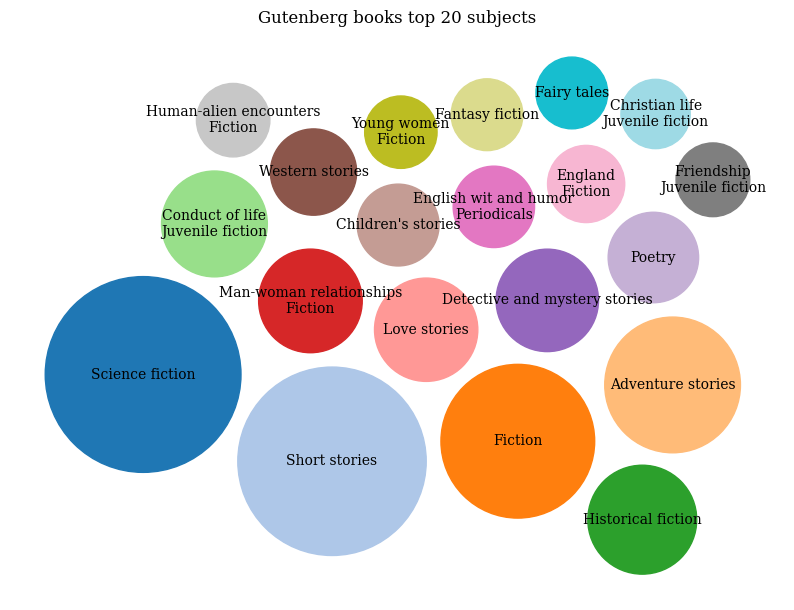

In [14]:
n = 20
gutenberg_books_subjects = {
    'subjects': gb.topn_subjects(n)['Subject'].replace({' -- ': '\n'}, regex=True).to_list(),
    'market_share': list(map(lambda x: x*n*3, gb.topn_subjects(n)['Count'].to_list())),
    'color': colors[:n]
}

bubble_chart = BubbleChart(area=gutenberg_books_subjects['market_share'],
                           bubble_spacing=2*n)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(10, 10))
bubble_chart.plot(
    ax, gutenberg_books_subjects['subjects'], gutenberg_books_subjects['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title(f'Gutenberg books top {n} subjects')

plt.show()

## Authors

### Count distinct authors

There are currently $37392$ distinct authors.

In [15]:
len(gb.get_authors())

37601

### All authors
The `data_table` library can only deal with a maximum of $20000$ rows. If the number of rows exceeds this limit, the usual Pandas display is used (with no interactivity).


In [16]:
pd.DataFrame(gb.get_authors())

0
Loading ITables v2.0.1 from the init_notebook_mode cell... (need help?)


### Top $n$ authors

In [17]:
n = 20000
gb.topn_authors(n)

Author  Count
0                                                Various   3917
1                                              Anonymous    910
2                        Shakespeare, William, 1564-1616    333
3                     Widger, David, 1932-2021? [Editor]    287
4                                 Twain, Mark, 1835-1910    250
...                                                  ...    ...
19995         Western Grammar School (Brompton, England)      1
19996          Poole, Edward Stanley, 1830-1867 [Editor]      1
19997  Poole, Bertram W. H. (Bertram William Henry), ...      1
19998         Westmorland, John Fane, Earl of, 1784-1859      1
19999                 Pollock, Walter Herries, 1850-1926      1

[20000 rows x 2 columns]

### Ten random authors

In [18]:
gb.random_authors(10, 42).sort_values(by='Count', ascending=False)

Author  Count
0                                                Various   3917
5         Lytton, Edward Bulwer Lytton, Baron, 1803-1873    226
115                    Morley, Henry, 1822-1894 [Editor]     57
1079      Grant, Ulysses S. (Ulysses Simpson), 1822-1885     13
4860                                   Memini, 1849-1897      3
4943           Tarkiainen, Viljo, 1879-1951 [Translator]      3
10795                    Howard, Justin H. [Illustrator]      2
9585                    Prime, Samuel Irenæus, 1812-1885      2
32612  Mackenzie, W. M. (William Mackay), 1871-1952 [...      1
24058        Eeden, Frederik van, 1860-1932 [Translator]      1

### Visualize most frequent authors

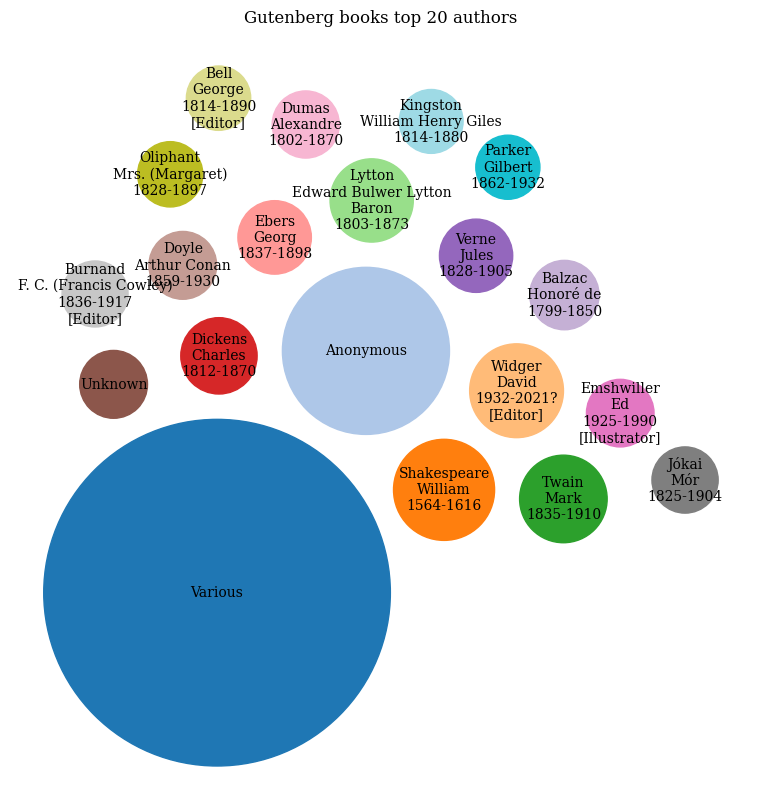

In [19]:
n = 20
gutenberg_books_authors = {
    'authors': gb.topn_authors(n)['Author'].replace({', ': '\n', ' \[': '\n['}, regex=True).to_list(),
    'market_share': list(map(lambda x: x*n*3, gb.topn_authors(n)['Count'].to_list())),
    'color': colors[:n]
}

bubble_chart = BubbleChart(area=gutenberg_books_authors['market_share'],
                           bubble_spacing=2*n)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"),figsize=(10, 10))
bubble_chart.plot(
    ax, gutenberg_books_authors['authors'], gutenberg_books_authors['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title(f'Gutenberg books top {n} authors')

plt.show()

## Types

### All types

In [20]:
pd.DataFrame(gb.get_types(), columns=['Type'])

Type
Loading ITables v2.0.1 from the init_notebook_mode cell... (need help?)


### Count books by types

In [21]:
grouped_counts = gb.catalog.groupby('Type').size().reset_index(name='Count')
grouped_counts

Type  Count
0   Collection      4
1      Dataset     89
2        Image     33
3  MovingImage      8
4        Sound   1114
5   StillImage      3
6         Text  72319

### Visualize types

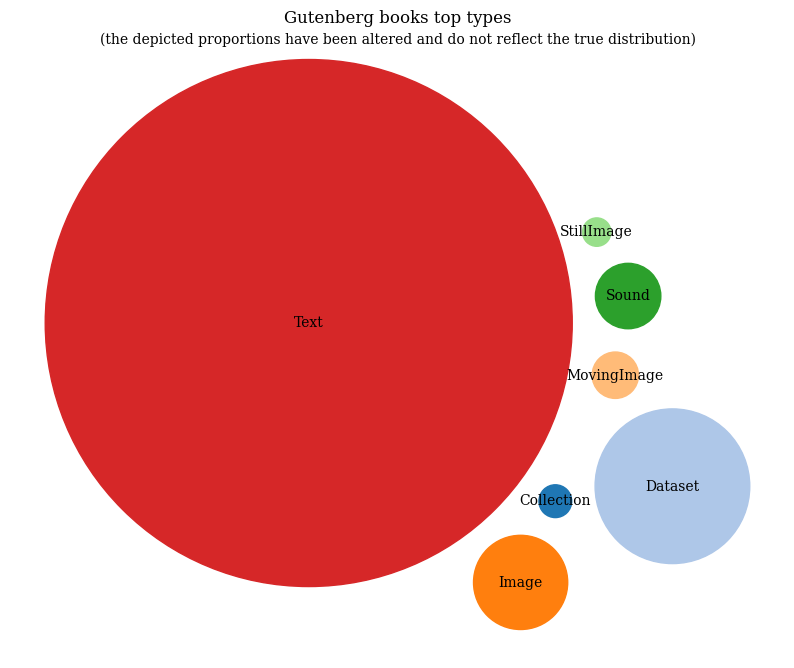

In [22]:
grouped_data = gb.catalog.groupby('Type').size().reset_index(name='Count')
n = len(grouped_data)
# Extracting values of 'Type' and 'Count' columns as lists
type_list = grouped_data['Type'].tolist()
count_list = grouped_data['Count'].tolist()
gutenberg_books_types = {
    'types': type_list,
    # adapt the size of smaller items
    'market_share': list(map(lambda x: x if x>1000 else x*n*10, count_list)),
    'color': colors[:-n]
}

bubble_chart = BubbleChart(area=gutenberg_books_types['market_share'],
                           bubble_spacing=2*n)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"),figsize=(10, 10))
bubble_chart.plot(
    ax, gutenberg_books_types['types'], gutenberg_books_types['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title(f'Gutenberg books top types')
subtitle = "(the depicted proportions have been altered and do not reflect the true distribution)"
# Set the subtitle below the main title
plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=plt.gca().transAxes)

plt.show()

I wasn't aware that the Gutenberg collection contained data other than text. I'll need to explore these additional data types at some point.

## Bookshelves

### Top $n$ bookshelves

In [23]:
n = 10
gb.topn_bookshelves(n)

Bookshelf  Count
0                                    Science Fiction   1341
1                                     FR Littérature   1101
2                             Children's Book Series    509
3                                              Punch    493
4                   Bestsellers, American, 1895-1923    426
5                                 Historical Fiction    384
6                                           DE Prosa    382
7                                        World War I    382
8                                 Children's Fiction    339
9  FR Biographie, Mémoires, Journal intime, Corre...    324

### Visualize most frequent bookshelves

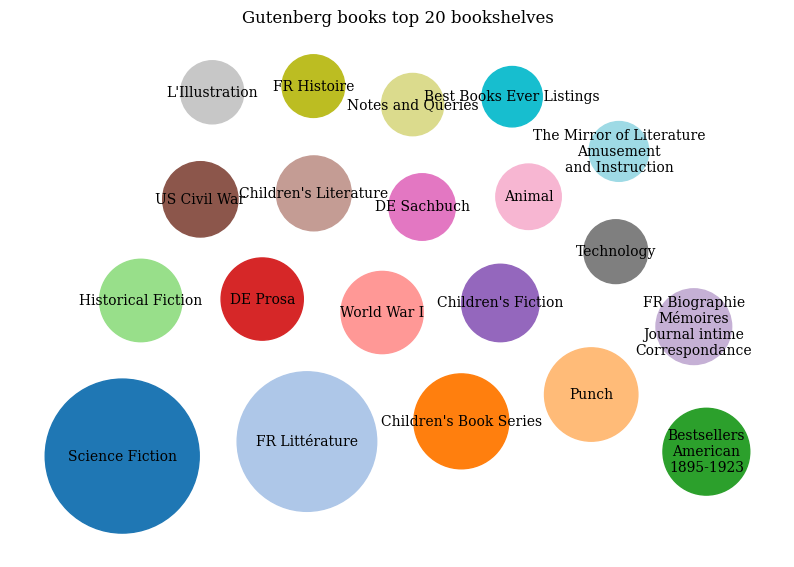

In [24]:
n = 20
gutenberg_books_bookshelves = {
    'bookshelves': gb.topn_bookshelves(n)['Bookshelf'].replace({', ': '\n'}, regex=True).to_list(),
    'market_share': list(map(lambda x: x*n*3, gb.topn_bookshelves(n)['Count'].to_list())),
    'color': colors[:n]
}

bubble_chart = BubbleChart(area=gutenberg_books_bookshelves['market_share'],
                           bubble_spacing=4*n)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(10, 10))
bubble_chart.plot(
    ax, gutenberg_books_bookshelves['bookshelves'], gutenberg_books_bookshelves['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title(f'Gutenberg books top {n} bookshelves')

plt.show()

### Books without bookshelf

Many books do not belong to any bookshelf

In [25]:
gb.catalog.count()

Text#          73570
Type           73570
Issued         73570
Title          73570
Language       73570
Authors        73400
Subjects       73520
LoCC           73319
Bookshelves    17168
dtype: int64

### Number of books without bookshelf

In [26]:
print(f"Number of books with no bookshelf: {gb.catalog[gb.catalog['Bookshelves'].isna()].shape[0]}")

Number of books with no bookshelf: 56402


### Five random books without bookshelf

In [27]:
gb.catalog[gb.catalog['Bookshelves'].isna()].sample(n=5, replace=False, random_state=42)

Text#  Type      Issued  \
42425  42499  Text  2013-04-08   
65437  65515  Text  2021-06-05   
61135  61212  Text  2020-01-21   
55029  55103  Text  2017-07-12   
39834  39908  Text  2012-06-03   

                                                   Title Language  \
42425                Miracle Gold: A Novel (Vol. 3 of 3)       en   
65437  Report on the Migration of Birds in the Spring...       en   
61135  English as She is Taught\r\nBeing Genuine Answ...       en   
55029                                           Erdgeist       de   
39834  Encyclopaedia Britannica, 11th Edition, "Inscr...       en   

                                                 Authors  \
42425                        Dowling, Richard, 1846-1898   
65437  Harvie-Brown, J. A. (John Alexander), 1844-191...   
61135  Le Row, Caroline B. (Caroline Bigelow), 1843- ...   
55029                         Wedekind, Frank, 1864-1918   
39834                                            Various   

                                                Subjects LoCC Bookshelves  
42425                                            Fiction   PR         NaN  
65437  Birds -- Migration -- Great Britain -- Periodi...   QL         NaN  
61135       English language -- Errors of usage -- Humor   LB         NaN  
55029            Tragedies; German drama -- 19th century   PT         NaN  
39834                     Encyclopedias and dictionaries   AE         NaN

## Languages

### Count distinct languages

The Gutenberg collection currently comprises 68 languages.

In [28]:
len(gb.get_languages())

68

### Top $n$ languages

In [29]:
gb.topn_languages(10)

Language  Count
0       en  59232
1       fr   3779
2       fi   2919
3       de   2210
4       nl   1011
5       it   1006
6       es    856
7       pt    641
8       hu    532
9       zh    444

### Visualize top $n$ languages

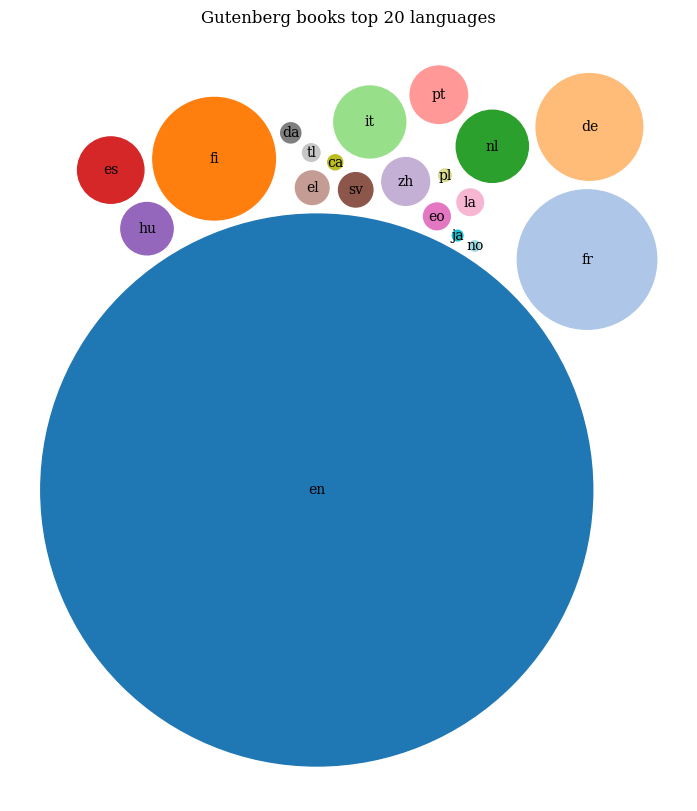

In [30]:
n = 20
gutenberg_books_languages = {
    'languages': gb.topn_languages(n)['Language'].to_list(),
    'market_share': list(map(lambda x: x*10, gb.topn_languages(n)['Count'].to_list())),
    'color': colors
}

bubble_chart = BubbleChart(area=gutenberg_books_languages['market_share'],
                           bubble_spacing=15)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(10, 10))
bubble_chart.plot(
    ax, gutenberg_books_languages['languages'], gutenberg_books_languages['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title(f'Gutenberg books top {n} languages')

plt.show()

## Match books using various criteria

### Match books by subject

In [31]:
substr = "description and travel"
gb.books_matching_subject(substr)

Text#  Type      Issued  \
226      245  Text  2004-07-10   
263      282  Text  1995-06-01   
307      326  Text  1995-09-01   
346      365  Text  2008-07-09   
363      382  Text  1995-12-01   
...      ...   ...         ...   
73356  73437  Text  2024-04-20   
73417  73498  Text  2024-04-30   
73445  73526  Text  2024-05-03   
73526  73607  Text  2024-05-12   
73559  73640  Text  2024-05-16   

                                                   Title Language  \
226                              Life on the Mississippi       en   
263    Eothen; Or, Traces of Travel Brought Home from...       en   
307                                         Steep Trails       en   
346                              The Land of Little Rain       en   
363                         Edinburgh: Picturesque Notes       en   
...                                                  ...      ...   
73356          Matkakuvaelmia ja muistoja Lapin rajoilta       fi   
73417                              My life on the plains       en   
73445  Rapport sur un voyage botanique en Algérie, de...       fr   
73526  A thousand miles on an elephant in the Shan St...       en   
73559                          Il diario di un viandante       it   

                                                 Authors  \
226                               Twain, Mark, 1835-1910   
263               Kinglake, Alexander William, 1809-1891   
307    Muir, John, 1838-1914; Badè, William Frederic,...   
346                              Austin, Mary, 1868-1934   
363                   Stevenson, Robert Louis, 1850-1894   
...                                                  ...   
73356  Nervander, Emil Fredrik, 1840-1914; Juuti, Toi...   
73417    Custer, George A. (George Armstrong), 1839-1876   
73445                     Cosson, E. (Ernest), 1819-1889   
73526          Hallett, Holt S. (Holt Samuel), 1841-1911   
73559                    Beltramelli, Antonio, 1874-1930   

                                                Subjects          LoCC  \
226    Mississippi River -- Description and travel; M...            PS   
263    Middle East -- Description and travel; Kinglak...            DS   
307    West (U.S.) -- Description and travel; Shasta,...        F590.3   
346    California -- Social life and customs; Natural...        F850.5   
363       Edinburgh (Scotland) -- Description and travel            DA   
...                                                  ...           ...   
73356                  Lapland -- Description and travel            DK   
73417  Generals -- United States -- Biography; United...  E011; F590.3   
73445  Algeria -- Description and travel; Plants -- A...            QK   
73526  Thailand -- Description and travel; Laos -- De...            DS   
73559  Voyages and travels; Lapland -- Description an...          D; G   

          Bookshelves  
226               NaN  
263               NaN  
307               NaN  
346               NaN  
363    United Kingdom  
...               ...  
73356             NaN  
73417             NaN  
73445             NaN  
73526             NaN  
73559             NaN  

[2973 rows x 9 columns]

### Match books by year

In [32]:
gb.books_matching_year(1984)

Text#     Type      Issued  \
27        34     Text  1992-06-01   
66        88     Text  1993-11-01   
187      250     Text  1995-04-01   
478      542     Text  1996-05-01   
680      745  Dataset  1996-12-01   
...      ...      ...         ...   
76641  73594     Text  2024-05-10   
76642  73594     Text  2024-05-10   
76643  73595     Text  2024-05-10   
76654  73604     Text  2024-05-11   
76691  73623     Text  2024-05-13   

                                                   Title Language  \
27                       Zen and the Art of the Internet       en   
66     Price/Cost Indexes from 1875 to 1989; Estimate...       en   
187    A Brief History of the Internet\r\nThe Bright ...       en   
478                     The Life of Me: An Autobiography       en   
680              One Divided by Pi (To 1 Million Digits)       en   
...                                                  ...      ...   
76641                            The passionate pitchman       en   
76642                            The passionate pitchman       en   
76643                                   Try to remember!       en   
76654                                     The red fetish       en   
76691              The war myth in United States history       en   

                                                 Authors  \
27                          Kehoe, Brendan P., 1970-2011   
66                              Hart, Michael, 1947-2011   
187            Hart, Michael, 1947-2011; Fuller, Maxwell   
478                   Johnson, Clarence Edgar, 1906-1994   
680                          Kanada, Yasumasa, 1949-2020   
...                                                  ...   
76641  Marlowe, Stephen, 1928-2008; Kotzky, Alex, 192...   
76642  Marlowe, Stephen, 1928-2008; Kotzky, Alex, 192...   
76643  Herbert, Frank, 1920-1986; Finlay, Virgil, 191...   
76654  Long, Frank Belknap, 1903-1994; Senf, C. C. (C...   
76691  Hamlin, C. H. (Charles Hunter), 1890-1985; Dol...   

                                                Subjects        LoCC  \
27     Internet; Computer networks; Information netwo...          TK   
66                           Cost and standard of living          HG   
187    Internet -- History; Computer networks -- Unit...          TK   
478    Johnson, Clarence Edgar, 1906-1994; Johnson fa...  CT; F350.5   
680                                          Mathematics          QA   
...                                                  ...         ...   
76641  Science fiction; Man-woman relationships -- Fi...          PS   
76642  Science fiction; Man-woman relationships -- Fi...          PS   
76643  Science fiction; Human-alien encounters -- Fic...          PS   
76654  Short stories; Shipwreck survival -- Fiction; ...          PS   
76691  United States -- History; War; Propaganda, Ame...        E151   

       Bookshelves  match  Birth_Year  Death_Year  
27             NaN      0        1970        2011  
66             NaN      0        1947        2011  
187            NaN      0        1947        2011  
478    Biographies      0        1906        1994  
680    Mathematics      0        1949        2020  
...            ...    ...         ...         ...  
76641          NaN      0        1928        2008  
76642          NaN      1        1923        1996  
76643          NaN      0        1920        1986  
76654          NaN      0        1903        1994  
76691          NaN      0        1890        1985  

[3123 rows x 12 columns]

In [33]:
help(GutenbergBooks.books_matching_year)

Help on function books_matching_year in module __main__:

books_matching_year(self, given_year)
    Find books from the catalog that match a given year within the birth-death intervals of authors.
    
    Parameters:
    - given_year (int): The year to match within the birth-death intervals of authors.
    
    Returns:
    - DataFrame: A DataFrame containing books from the catalog where the given year falls within
                 the birth-death intervals of authors.
    
    This method extracts birth and death years from the 'Authors' column of the catalog and filters
    rows where the given year is within any birth-death interval. It returns a DataFrame of matching books.



# Downloading files from the Gutenberg collection

⚠️ Please read carefully this notice about the Gutenberg Project's policies on bulk downloading:



> “ _The Project Gutenberg website is intended for human users only. Any perceived use of automated tools to access the Project Gutenberg website will result in a temporary or permanent block of your IP address._ ”

See: https://www.gutenberg.org/policy/robot_access.html.


## The cache directory

By default, `GutenbergBooks` is the directory where all downloaded books are stored. If a book is alredy in the `GutenbergBooks` directory it won't be downloaded again.

⚠️ The cache directory is empty when you start your Google Colab session! ⚠️

## Download one book

In [34]:
gb.download_book(5687)

Retrieving pg5687.txt from https://www.gutenberg.org/cache/epub/5687/pg5687.txt.


'GutenbergBooks/pg5687.txt'

The same book won't be downloaded because it already exists in the cache directory `GutenbergBooks`.

In [35]:
gb.download_book(5687)

Book 5687 already exists in cache. Not downloading.


'GutenbergBooks/pg5687.txt'

In [36]:
help(GutenbergBooks.download_book)

Help on function download_book in module __main__:

download_book(self, nr)
    Download one book from the Gutenberg collection identified by its id.
    If the book already exists in the cache folder, it is not downloaded again.
    Parameters:
    - nr (int): id of the book in the Gutenberg books collection.
    Returns:
    - str: the path where the book was downloaded.



## Download multiple books

In [37]:
gb.download_books([5678, 5679, 5680])

Retrieving pg5678.txt from https://www.gutenberg.org/cache/epub/5678/pg5678.txt.


Retrieving pg5679.txt from https://www.gutenberg.org/cache/epub/5679/pg5679.txt.


Retrieving pg5680.txt from https://www.gutenberg.org/cache/epub/5680/pg5680.txt.


['GutenbergBooks/pg5678.txt',
 'GutenbergBooks/pg5679.txt',
 'GutenbergBooks/pg5680.txt']

In [38]:
help(GutenbergBooks.download_books)

Help on function download_books in module __main__:

download_books(self, books)
    Download a list of books from the Gutenberg collection.
    If a book already exists in the cache folder, it is not downloaded again.
    Parameters:
    - books (list): list of ids of books in the Gutenberg books collection.
    Returns:
    - str: the path where the book was downloaded.



## Download $n$ books by subject

In [39]:
gb.download_n_books(5, "\(South Africa\) -- Description and travel")

Retrieving pg886.txt from https://www.gutenberg.org/cache/epub/886/pg886.txt.


Retrieving pg21704.txt from https://www.gutenberg.org/cache/epub/21704/pg21704.txt.


Retrieving pg36951.txt from https://www.gutenberg.org/cache/epub/36951/pg36951.txt.


Retrieving pg40925.txt from https://www.gutenberg.org/cache/epub/40925/pg40925.txt.


Retrieving pg42737.txt from https://www.gutenberg.org/cache/epub/42737/pg42737.txt.


['GutenbergBooks/pg886.txt',
 'GutenbergBooks/pg21704.txt',
 'GutenbergBooks/pg36951.txt',
 'GutenbergBooks/pg40925.txt',
 'GutenbergBooks/pg42737.txt']

## Download a given amount of books by subject

DOwnload books matching a certain subject. Stop when the threshold given by the `size_mb` (size in Megabytes) parameter is reached.

If not specified, `size_mb` is $128$ (the default Hadoop block size).

In [40]:
gb.download_size_books(subject="\(South Africa\) -- Description and travel")

Book 886 already exists in cache. Not downloading.
Book 21704 already exists in cache. Not downloading.
Book 36951 already exists in cache. Not downloading.
Book 40925 already exists in cache. Not downloading.
Book 42737 already exists in cache. Not downloading.
Retrieving pg42767.txt from https://www.gutenberg.org/cache/epub/42767/pg42767.txt.


Retrieving pg53574.txt from https://www.gutenberg.org/cache/epub/53574/pg53574.txt.


Retrieving pg63906.txt from https://www.gutenberg.org/cache/epub/63906/pg63906.txt.


Retrieving pg63920.txt from https://www.gutenberg.org/cache/epub/63920/pg63920.txt.


Retrieving pg66742.txt from https://www.gutenberg.org/cache/epub/66742/pg66742.txt.


Book 886 already exists in cache. Not downloading.
Book 21704 already exists in cache. Not downloading.
Book 36951 already exists in cache. Not downloading.
Book 40925 already exists in cache. Not downloading.
Book 42737 already exists in cache. Not downloading.
Book 42767 already exists in cache. Not downloading.
Book 53574 already exists in cache. Not downloading.
Book 63906 already exists in cache. Not downloading.
Book 63920 already exists in cache. Not downloading.
Book 66742 already exists in cache. Not downloading.
Total size: 3MB
Download more books to get 128MB


['GutenbergBooks/pg886.txt',
 'GutenbergBooks/pg21704.txt',
 'GutenbergBooks/pg36951.txt',
 'GutenbergBooks/pg40925.txt',
 'GutenbergBooks/pg42737.txt',
 'GutenbergBooks/pg42767.txt',
 'GutenbergBooks/pg53574.txt',
 'GutenbergBooks/pg63906.txt',
 'GutenbergBooks/pg63920.txt',
 'GutenbergBooks/pg66742.txt']

In [41]:
!du -sh GutenbergBooks

5.0M	GutenbergBooks


In [42]:
subject = "United States -- Description and travel"
gb.download_size_books(size_mb=90, subject=subject)

Retrieving pg675.txt from https://www.gutenberg.org/cache/epub/675/pg675.txt.


Retrieving pg968.txt from https://www.gutenberg.org/cache/epub/968/pg968.txt.


Retrieving pg977.txt from https://www.gutenberg.org/cache/epub/977/pg977.txt.


Retrieving pg1082.txt from https://www.gutenberg.org/cache/epub/1082/pg1082.txt.


Retrieving pg1865.txt from https://www.gutenberg.org/cache/epub/1865/pg1865.txt.


Retrieving pg1866.txt from https://www.gutenberg.org/cache/epub/1866/pg1866.txt.


Retrieving pg2869.txt from https://www.gutenberg.org/cache/epub/2869/pg2869.txt.


Retrieving pg3547.txt from https://www.gutenberg.org/cache/epub/3547/pg3547.txt.


Retrieving pg4666.txt from https://www.gutenberg.org/cache/epub/4666/pg4666.txt.


Retrieving pg6445.txt from https://www.gutenberg.org/cache/epub/6445/pg6445.txt.


Retrieving pg6874.txt from https://www.gutenberg.org/cache/epub/6874/pg6874.txt.


Retrieving pg6876.txt from https://www.gutenberg.org/cache/epub/6876/pg6876.txt.


Retrieving pg7237.txt from https://www.gutenberg.org/cache/epub/7237/pg7237.txt.


Retrieving pg7526.txt from https://www.gutenberg.org/cache/epub/7526/pg7526.txt.


Retrieving pg7997.txt from https://www.gutenberg.org/cache/epub/7997/pg7997.txt.


Retrieving pg9693.txt from https://www.gutenberg.org/cache/epub/9693/pg9693.txt.
Retrieving pg9699.txt from https://www.gutenberg.org/cache/epub/9699/pg9699.txt.


Retrieving pg10345.txt from https://www.gutenberg.org/cache/epub/10345/pg10345.txt.


Retrieving pg10619.txt from https://www.gutenberg.org/cache/epub/10619/pg10619.txt.


Retrieving pg10637.txt from https://www.gutenberg.org/cache/epub/10637/pg10637.txt.


Retrieving pg10857.txt from https://www.gutenberg.org/cache/epub/10857/pg10857.txt.


Retrieving pg10898.txt from https://www.gutenberg.org/cache/epub/10898/pg10898.txt.


Retrieving pg11013.txt from https://www.gutenberg.org/cache/epub/11013/pg11013.txt.


Retrieving pg11329.txt from https://www.gutenberg.org/cache/epub/11329/pg11329.txt.


Retrieving pg11454.txt from https://www.gutenberg.org/cache/epub/11454/pg11454.txt.


Retrieving pg11545.txt from https://www.gutenberg.org/cache/epub/11545/pg11545.txt.


Retrieving pg11725.txt from https://www.gutenberg.org/cache/epub/11725/pg11725.txt.


Retrieving pg12022.txt from https://www.gutenberg.org/cache/epub/12022/pg12022.txt.


Retrieving pg12266.txt from https://www.gutenberg.org/cache/epub/12266/pg12266.txt.


Retrieving pg12380.txt from https://www.gutenberg.org/cache/epub/12380/pg12380.txt.


Retrieving pg13095.txt from https://www.gutenberg.org/cache/epub/13095/pg13095.txt.


Retrieving pg14191.txt from https://www.gutenberg.org/cache/epub/14191/pg14191.txt.


Retrieving pg15463.txt from https://www.gutenberg.org/cache/epub/15463/pg15463.txt.


Retrieving pg17648.txt from https://www.gutenberg.org/cache/epub/17648/pg17648.txt.


Retrieving pg18634.txt from https://www.gutenberg.org/cache/epub/18634/pg18634.txt.


Retrieving pg22796.txt from https://www.gutenberg.org/cache/epub/22796/pg22796.txt.


Retrieving pg22831.txt from https://www.gutenberg.org/cache/epub/22831/pg22831.txt.


Retrieving pg23137.txt from https://www.gutenberg.org/cache/epub/23137/pg23137.txt.


Retrieving pg23138.txt from https://www.gutenberg.org/cache/epub/23138/pg23138.txt.


Retrieving pg23258.txt from https://www.gutenberg.org/cache/epub/23258/pg23258.txt.


Retrieving pg23284.txt from https://www.gutenberg.org/cache/epub/23284/pg23284.txt.


Retrieving pg24190.txt from https://www.gutenberg.org/cache/epub/24190/pg24190.txt.


Retrieving pg24626.txt from https://www.gutenberg.org/cache/epub/24626/pg24626.txt.


Retrieving pg24752.txt from https://www.gutenberg.org/cache/epub/24752/pg24752.txt.


Retrieving pg25786.txt from https://www.gutenberg.org/cache/epub/25786/pg25786.txt.


Retrieving pg27002.txt from https://www.gutenberg.org/cache/epub/27002/pg27002.txt.


Retrieving pg27250.txt from https://www.gutenberg.org/cache/epub/27250/pg27250.txt.


Retrieving pg27800.txt from https://www.gutenberg.org/cache/epub/27800/pg27800.txt.


Retrieving pg28323.txt from https://www.gutenberg.org/cache/epub/28323/pg28323.txt.


Retrieving pg30503.txt from https://www.gutenberg.org/cache/epub/30503/pg30503.txt.


Retrieving pg31110.txt from https://www.gutenberg.org/cache/epub/31110/pg31110.txt.


Retrieving pg31832.txt from https://www.gutenberg.org/cache/epub/31832/pg31832.txt.


Retrieving pg32261.txt from https://www.gutenberg.org/cache/epub/32261/pg32261.txt.


Retrieving pg32333.txt from https://www.gutenberg.org/cache/epub/32333/pg32333.txt.


Retrieving pg32977.txt from https://www.gutenberg.org/cache/epub/32977/pg32977.txt.


Retrieving pg33320.txt from https://www.gutenberg.org/cache/epub/33320/pg33320.txt.


Retrieving pg33620.txt from https://www.gutenberg.org/cache/epub/33620/pg33620.txt.


Retrieving pg34708.txt from https://www.gutenberg.org/cache/epub/34708/pg34708.txt.


Retrieving pg35104.txt from https://www.gutenberg.org/cache/epub/35104/pg35104.txt.


Retrieving pg35327.txt from https://www.gutenberg.org/cache/epub/35327/pg35327.txt.


Retrieving pg35575.txt from https://www.gutenberg.org/cache/epub/35575/pg35575.txt.


Retrieving pg35965.txt from https://www.gutenberg.org/cache/epub/35965/pg35965.txt.


Retrieving pg36126.txt from https://www.gutenberg.org/cache/epub/36126/pg36126.txt.


Retrieving pg37615.txt from https://www.gutenberg.org/cache/epub/37615/pg37615.txt.


Retrieving pg38644.txt from https://www.gutenberg.org/cache/epub/38644/pg38644.txt.


Retrieving pg38784.txt from https://www.gutenberg.org/cache/epub/38784/pg38784.txt.


Retrieving pg39760.txt from https://www.gutenberg.org/cache/epub/39760/pg39760.txt.


Retrieving pg39809.txt from https://www.gutenberg.org/cache/epub/39809/pg39809.txt.


Retrieving pg40280.txt from https://www.gutenberg.org/cache/epub/40280/pg40280.txt.


Retrieving pg40281.txt from https://www.gutenberg.org/cache/epub/40281/pg40281.txt.


Retrieving pg40884.txt from https://www.gutenberg.org/cache/epub/40884/pg40884.txt.


Retrieving pg41417.txt from https://www.gutenberg.org/cache/epub/41417/pg41417.txt.


Retrieving pg41639.txt from https://www.gutenberg.org/cache/epub/41639/pg41639.txt.


Retrieving pg41742.txt from https://www.gutenberg.org/cache/epub/41742/pg41742.txt.


Retrieving pg41755.txt from https://www.gutenberg.org/cache/epub/41755/pg41755.txt.


Retrieving pg41776.txt from https://www.gutenberg.org/cache/epub/41776/pg41776.txt.
Retrieving pg41806.txt from https://www.gutenberg.org/cache/epub/41806/pg41806.txt.


Retrieving pg41913.txt from https://www.gutenberg.org/cache/epub/41913/pg41913.txt.
Retrieving pg42252.txt from https://www.gutenberg.org/cache/epub/42252/pg42252.txt.


Retrieving pg42309.txt from https://www.gutenberg.org/cache/epub/42309/pg42309.txt.
Retrieving pg42364.txt from https://www.gutenberg.org/cache/epub/42364/pg42364.txt.


Retrieving pg42842.txt from https://www.gutenberg.org/cache/epub/42842/pg42842.txt.
Retrieving pg42872.txt from https://www.gutenberg.org/cache/epub/42872/pg42872.txt.


Retrieving pg43537.txt from https://www.gutenberg.org/cache/epub/43537/pg43537.txt.
Retrieving pg43978.txt from https://www.gutenberg.org/cache/epub/43978/pg43978.txt.


Retrieving pg44333.txt from https://www.gutenberg.org/cache/epub/44333/pg44333.txt.
Retrieving pg44505.txt from https://www.gutenberg.org/cache/epub/44505/pg44505.txt.


Retrieving pg44854.txt from https://www.gutenberg.org/cache/epub/44854/pg44854.txt.
Retrieving pg45761.txt from https://www.gutenberg.org/cache/epub/45761/pg45761.txt.


Retrieving pg46835.txt from https://www.gutenberg.org/cache/epub/46835/pg46835.txt.
Retrieving pg46870.txt from https://www.gutenberg.org/cache/epub/46870/pg46870.txt.


Retrieving pg47392.txt from https://www.gutenberg.org/cache/epub/47392/pg47392.txt.
Retrieving pg47698.txt from https://www.gutenberg.org/cache/epub/47698/pg47698.txt.


Retrieving pg47706.txt from https://www.gutenberg.org/cache/epub/47706/pg47706.txt.
Retrieving pg47716.txt from https://www.gutenberg.org/cache/epub/47716/pg47716.txt.


Retrieving pg48140.txt from https://www.gutenberg.org/cache/epub/48140/pg48140.txt.
Retrieving pg48235.txt from https://www.gutenberg.org/cache/epub/48235/pg48235.txt.


Retrieving pg48651.txt from https://www.gutenberg.org/cache/epub/48651/pg48651.txt.
Retrieving pg48652.txt from https://www.gutenberg.org/cache/epub/48652/pg48652.txt.


Retrieving pg49042.txt from https://www.gutenberg.org/cache/epub/49042/pg49042.txt.
Retrieving pg49043.txt from https://www.gutenberg.org/cache/epub/49043/pg49043.txt.


Retrieving pg49354.txt from https://www.gutenberg.org/cache/epub/49354/pg49354.txt.
Retrieving pg49376.txt from https://www.gutenberg.org/cache/epub/49376/pg49376.txt.


Retrieving pg49474.txt from https://www.gutenberg.org/cache/epub/49474/pg49474.txt.
Retrieving pg49894.txt from https://www.gutenberg.org/cache/epub/49894/pg49894.txt.


Retrieving pg50036.txt from https://www.gutenberg.org/cache/epub/50036/pg50036.txt.
Retrieving pg51341.txt from https://www.gutenberg.org/cache/epub/51341/pg51341.txt.


Retrieving pg51430.txt from https://www.gutenberg.org/cache/epub/51430/pg51430.txt.
Retrieving pg51800.txt from https://www.gutenberg.org/cache/epub/51800/pg51800.txt.


Retrieving pg52290.txt from https://www.gutenberg.org/cache/epub/52290/pg52290.txt.
Retrieving pg52357.txt from https://www.gutenberg.org/cache/epub/52357/pg52357.txt.


Retrieving pg52621.txt from https://www.gutenberg.org/cache/epub/52621/pg52621.txt.
Retrieving pg52685.txt from https://www.gutenberg.org/cache/epub/52685/pg52685.txt.


Retrieving pg53940.txt from https://www.gutenberg.org/cache/epub/53940/pg53940.txt.
Retrieving pg54386.txt from https://www.gutenberg.org/cache/epub/54386/pg54386.txt.


Retrieving pg54391.txt from https://www.gutenberg.org/cache/epub/54391/pg54391.txt.
Retrieving pg54433.txt from https://www.gutenberg.org/cache/epub/54433/pg54433.txt.


Retrieving pg54502.txt from https://www.gutenberg.org/cache/epub/54502/pg54502.txt.
Retrieving pg55713.txt from https://www.gutenberg.org/cache/epub/55713/pg55713.txt.


Retrieving pg56348.txt from https://www.gutenberg.org/cache/epub/56348/pg56348.txt.
Retrieving pg56519.txt from https://www.gutenberg.org/cache/epub/56519/pg56519.txt.


Retrieving pg57854.txt from https://www.gutenberg.org/cache/epub/57854/pg57854.txt.
Retrieving pg57963.txt from https://www.gutenberg.org/cache/epub/57963/pg57963.txt.


Retrieving pg58447.txt from https://www.gutenberg.org/cache/epub/58447/pg58447.txt.


Retrieving pg58575.txt from https://www.gutenberg.org/cache/epub/58575/pg58575.txt.
Retrieving pg58910.txt from https://www.gutenberg.org/cache/epub/58910/pg58910.txt.


Retrieving pg59066.txt from https://www.gutenberg.org/cache/epub/59066/pg59066.txt.
Retrieving pg59218.txt from https://www.gutenberg.org/cache/epub/59218/pg59218.txt.


Retrieving pg59219.txt from https://www.gutenberg.org/cache/epub/59219/pg59219.txt.
Retrieving pg60060.txt from https://www.gutenberg.org/cache/epub/60060/pg60060.txt.


Retrieving pg61518.txt from https://www.gutenberg.org/cache/epub/61518/pg61518.txt.
Retrieving pg61778.txt from https://www.gutenberg.org/cache/epub/61778/pg61778.txt.


Retrieving pg62398.txt from https://www.gutenberg.org/cache/epub/62398/pg62398.txt.
Retrieving pg63005.txt from https://www.gutenberg.org/cache/epub/63005/pg63005.txt.


Retrieving pg64349.txt from https://www.gutenberg.org/cache/epub/64349/pg64349.txt.
Retrieving pg65056.txt from https://www.gutenberg.org/cache/epub/65056/pg65056.txt.


Retrieving pg65981.txt from https://www.gutenberg.org/cache/epub/65981/pg65981.txt.
Retrieving pg66096.txt from https://www.gutenberg.org/cache/epub/66096/pg66096.txt.


Retrieving pg66860.txt from https://www.gutenberg.org/cache/epub/66860/pg66860.txt.
Retrieving pg67348.txt from https://www.gutenberg.org/cache/epub/67348/pg67348.txt.


Retrieving pg68126.txt from https://www.gutenberg.org/cache/epub/68126/pg68126.txt.
Retrieving pg68717.txt from https://www.gutenberg.org/cache/epub/68717/pg68717.txt.


Retrieving pg69774.txt from https://www.gutenberg.org/cache/epub/69774/pg69774.txt.
Retrieving pg70064.txt from https://www.gutenberg.org/cache/epub/70064/pg70064.txt.


Retrieving pg70084.txt from https://www.gutenberg.org/cache/epub/70084/pg70084.txt.
Retrieving pg71453.txt from https://www.gutenberg.org/cache/epub/71453/pg71453.txt.


Retrieving pg71685.txt from https://www.gutenberg.org/cache/epub/71685/pg71685.txt.
Retrieving pg71849.txt from https://www.gutenberg.org/cache/epub/71849/pg71849.txt.


Retrieving pg72103.txt from https://www.gutenberg.org/cache/epub/72103/pg72103.txt.
Retrieving pg72696.txt from https://www.gutenberg.org/cache/epub/72696/pg72696.txt.


Retrieving pg72737.txt from https://www.gutenberg.org/cache/epub/72737/pg72737.txt.
Retrieving pg73044.txt from https://www.gutenberg.org/cache/epub/73044/pg73044.txt.


Book 675 already exists in cache. Not downloading.
Book 968 already exists in cache. Not downloading.
Book 977 already exists in cache. Not downloading.
Book 1082 already exists in cache. Not downloading.
Book 1865 already exists in cache. Not downloading.
Book 1866 already exists in cache. Not downloading.
Book 2869 already exists in cache. Not downloading.
Book 3547 already exists in cache. Not downloading.
Book 4666 already exists in cache. Not downloading.
Book 6445 already exists in cache. Not downloading.
Book 6874 already exists in cache. Not downloading.
Book 6876 already exists in cache. Not downloading.
Book 7237 already exists in cache. Not downloading.
Book 7526 already exists in cache. Not downloading.
Book 7997 already exists in cache. Not downloading.
Book 9693 already exists in cache. Not downloading.
Book 9699 already exists in cache. Not downloading.
Book 10345 already exists in cache. Not downloading.
Book 10619 already exists in cache. Not downloading.
Book 10637 al

['GutenbergBooks/pg675.txt',
 'GutenbergBooks/pg968.txt',
 'GutenbergBooks/pg977.txt',
 'GutenbergBooks/pg1082.txt',
 'GutenbergBooks/pg1865.txt',
 'GutenbergBooks/pg1866.txt',
 'GutenbergBooks/pg2869.txt',
 'GutenbergBooks/pg3547.txt',
 'GutenbergBooks/pg4666.txt',
 'GutenbergBooks/pg6445.txt',
 'GutenbergBooks/pg6874.txt',
 'GutenbergBooks/pg6876.txt',
 'GutenbergBooks/pg7237.txt',
 'GutenbergBooks/pg7526.txt',
 'GutenbergBooks/pg7997.txt',
 'GutenbergBooks/pg9693.txt',
 'GutenbergBooks/pg9699.txt',
 'GutenbergBooks/pg10345.txt',
 'GutenbergBooks/pg10619.txt',
 'GutenbergBooks/pg10637.txt',
 'GutenbergBooks/pg10857.txt',
 'GutenbergBooks/pg10898.txt',
 'GutenbergBooks/pg11013.txt',
 'GutenbergBooks/pg11329.txt',
 'GutenbergBooks/pg11454.txt',
 'GutenbergBooks/pg11545.txt',
 'GutenbergBooks/pg11725.txt',
 'GutenbergBooks/pg12022.txt',
 'GutenbergBooks/pg12266.txt',
 'GutenbergBooks/pg12380.txt',
 'GutenbergBooks/pg13095.txt',
 'GutenbergBooks/pg14191.txt',
 'GutenbergBooks/pg15463.txt

In [43]:
!du -sh GutenbergBooks

83M	GutenbergBooks


It's not easy to get enough data!

In [44]:
subject = "California -- Description and travel"
gb.download_size_books(size_mb=50, subject=subject)

Retrieving pg365.txt from https://www.gutenberg.org/cache/epub/365/pg365.txt.


Retrieving pg465.txt from https://www.gutenberg.org/cache/epub/465/pg465.txt.


Retrieving pg516.txt from https://www.gutenberg.org/cache/epub/516/pg516.txt.


Retrieving pg3126.txt from https://www.gutenberg.org/cache/epub/3126/pg3126.txt.


Retrieving pg3311.txt from https://www.gutenberg.org/cache/epub/3311/pg3311.txt.


Retrieving pg4636.txt from https://www.gutenberg.org/cache/epub/4636/pg4636.txt.


Retrieving pg4755.txt from https://www.gutenberg.org/cache/epub/4755/pg4755.txt.


Retrieving pg10012.txt from https://www.gutenberg.org/cache/epub/10012/pg10012.txt.


Retrieving pg10217.txt from https://www.gutenberg.org/cache/epub/10217/pg10217.txt.


Book 12022 already exists in cache. Not downloading.
Retrieving pg12518.txt from https://www.gutenberg.org/cache/epub/12518/pg12518.txt.


Retrieving pg12564.txt from https://www.gutenberg.org/cache/epub/12564/pg12564.txt.


Retrieving pg13002.txt from https://www.gutenberg.org/cache/epub/13002/pg13002.txt.


Retrieving pg13222.txt from https://www.gutenberg.org/cache/epub/13222/pg13222.txt.


Retrieving pg13298.txt from https://www.gutenberg.org/cache/epub/13298/pg13298.txt.


Retrieving pg13321.txt from https://www.gutenberg.org/cache/epub/13321/pg13321.txt.


Retrieving pg19479.txt from https://www.gutenberg.org/cache/epub/19479/pg19479.txt.


Retrieving pg23280.txt from https://www.gutenberg.org/cache/epub/23280/pg23280.txt.


Retrieving pg24816.txt from https://www.gutenberg.org/cache/epub/24816/pg24816.txt.


Retrieving pg28034.txt from https://www.gutenberg.org/cache/epub/28034/pg28034.txt.


Retrieving pg32178.txt from https://www.gutenberg.org/cache/epub/32178/pg32178.txt.


Retrieving pg36680.txt from https://www.gutenberg.org/cache/epub/36680/pg36680.txt.


Retrieving pg39497.txt from https://www.gutenberg.org/cache/epub/39497/pg39497.txt.


Retrieving pg42579.txt from https://www.gutenberg.org/cache/epub/42579/pg42579.txt.


Retrieving pg44764.txt from https://www.gutenberg.org/cache/epub/44764/pg44764.txt.


Retrieving pg46110.txt from https://www.gutenberg.org/cache/epub/46110/pg46110.txt.


Retrieving pg48142.txt from https://www.gutenberg.org/cache/epub/48142/pg48142.txt.


Retrieving pg48156.txt from https://www.gutenberg.org/cache/epub/48156/pg48156.txt.


Retrieving pg48407.txt from https://www.gutenberg.org/cache/epub/48407/pg48407.txt.


Retrieving pg51893.txt from https://www.gutenberg.org/cache/epub/51893/pg51893.txt.


Retrieving pg54422.txt from https://www.gutenberg.org/cache/epub/54422/pg54422.txt.


Retrieving pg57580.txt from https://www.gutenberg.org/cache/epub/57580/pg57580.txt.


Retrieving pg60359.txt from https://www.gutenberg.org/cache/epub/60359/pg60359.txt.


Retrieving pg60749.txt from https://www.gutenberg.org/cache/epub/60749/pg60749.txt.


Retrieving pg62155.txt from https://www.gutenberg.org/cache/epub/62155/pg62155.txt.


Book 63005 already exists in cache. Not downloading.
Retrieving pg68972.txt from https://www.gutenberg.org/cache/epub/68972/pg68972.txt.


Retrieving pg69295.txt from https://www.gutenberg.org/cache/epub/69295/pg69295.txt.


Retrieving pg69412.txt from https://www.gutenberg.org/cache/epub/69412/pg69412.txt.


Retrieving pg70022.txt from https://www.gutenberg.org/cache/epub/70022/pg70022.txt.


Retrieving pg71353.txt from https://www.gutenberg.org/cache/epub/71353/pg71353.txt.


Retrieving pg71549.txt from https://www.gutenberg.org/cache/epub/71549/pg71549.txt.


Book 365 already exists in cache. Not downloading.
Book 465 already exists in cache. Not downloading.
Book 516 already exists in cache. Not downloading.
Book 3126 already exists in cache. Not downloading.
Book 3311 already exists in cache. Not downloading.
Book 4636 already exists in cache. Not downloading.
Book 4755 already exists in cache. Not downloading.
Book 10012 already exists in cache. Not downloading.
Book 10217 already exists in cache. Not downloading.
Book 12022 already exists in cache. Not downloading.
Book 12518 already exists in cache. Not downloading.
Book 12564 already exists in cache. Not downloading.
Book 13002 already exists in cache. Not downloading.
Book 13222 already exists in cache. Not downloading.
Book 13298 already exists in cache. Not downloading.
Book 13321 already exists in cache. Not downloading.
Book 19479 already exists in cache. Not downloading.
Book 23280 already exists in cache. Not downloading.
Book 24816 already exists in cache. Not downloading.
Boo

['GutenbergBooks/pg365.txt',
 'GutenbergBooks/pg465.txt',
 'GutenbergBooks/pg516.txt',
 'GutenbergBooks/pg3126.txt',
 'GutenbergBooks/pg3311.txt',
 'GutenbergBooks/pg4636.txt',
 'GutenbergBooks/pg4755.txt',
 'GutenbergBooks/pg10012.txt',
 'GutenbergBooks/pg10217.txt',
 'GutenbergBooks/pg12022.txt',
 'GutenbergBooks/pg12518.txt',
 'GutenbergBooks/pg12564.txt',
 'GutenbergBooks/pg13002.txt',
 'GutenbergBooks/pg13222.txt',
 'GutenbergBooks/pg13298.txt',
 'GutenbergBooks/pg13321.txt',
 'GutenbergBooks/pg19479.txt',
 'GutenbergBooks/pg23280.txt',
 'GutenbergBooks/pg24816.txt',
 'GutenbergBooks/pg28034.txt',
 'GutenbergBooks/pg32178.txt',
 'GutenbergBooks/pg36680.txt',
 'GutenbergBooks/pg39497.txt',
 'GutenbergBooks/pg42579.txt',
 'GutenbergBooks/pg44764.txt',
 'GutenbergBooks/pg46110.txt',
 'GutenbergBooks/pg48142.txt',
 'GutenbergBooks/pg48156.txt',
 'GutenbergBooks/pg48407.txt',
 'GutenbergBooks/pg51893.txt',
 'GutenbergBooks/pg54422.txt',
 'GutenbergBooks/pg57580.txt',
 'GutenbergBooks/p

In [45]:
!du -sh GutenbergBooks

96M	GutenbergBooks


# Acknowledgements and some thoughts on Artificial Intelligence

For this tutorial I've made extensive use of the ChatGPT (version $3.5$) AI to:
- improve my English
- define code structure
- write Python code snippets
- document code

I ideated, organized, adapted, double-checked all content (both text and code) with the aim of creating a useful tool for exploring the Gutenberg books collection and providing a pleasant user experience.

I can imagine that in the future AI will be able to write such tutorials on their own and then the role of a tutorial author will be limited to defining requirements. Maybe there are going to be self-adapting tutorials that create themselves on the spot according to the needs of the readers, thus bypassing the need for tutorial authors. What are tutorial authors going to do then? Something else 😀!


In this spirit, I'd like to thank everyone who contributed to the common sense language collection (both natural and programming languages) used to train ChatGPT, the creators of ChatGPT, and the companies making it available as a comfortable Web application.